In [1]:
from neo4j import GraphDatabase, basic_auth
import os
import uuid
import sys
sys.path.append('../')
import trengx as t

uri = os.getenv('NEO4J_URI') # Get the value of the uri variable
user = os.getenv('NEO4J_USER') # Get the value of the user variable
password= os.getenv('NEO4J_PASSWORD')  # Get the value of the password variable

# Create a Neo4j driver and add a node
g = GraphDatabase.driver(uri, auth=basic_auth(user, password))
id = uuid.uuid1()
node1 = t.node(g, id=id, label='num', name="operand", value=2, grad=0.1)
print(node1)

Node(id=c6fb6dd0-0e78-11ee-b4ce-f736a911ff82, label=num, name=operand, value=2, grad=0.1)


In [2]:
from neo4j import GraphDatabase, basic_auth
import os
import uuid
import sys
sys.path.append('../')
import trengx as t

# get environment variables
uri = os.getenv('NEO4J_URI')
user = os.getenv('NEO4J_USER')
password = os.getenv('NEO4J_PASSWORD')

# create a Neo4j driver
driver = GraphDatabase.driver(uri, auth=basic_auth(user, password))

# create two nodes
id1 = str(uuid.uuid1())
node1 = t.node(driver, id=id1, label='num', name="x", value=2, grad=0.1)
id2 = str(uuid.uuid1())
node2 = t.node(driver, id=id2, label='op', name="sin")

# create an edge between the two nodes
id3 = str(uuid.uuid1())
edge = t.edge(driver, node1.id, node2.id, id=id3, label='num2op', second_operand=False)

# print the nodes and the edge
print(node1)
print(node2)
print(edge)


Node(id=c78c052a-0e78-11ee-84e9-f736a911ff82, label=num, name=x, value=2, grad=0.1)
Node(id=c80db39e-0e78-11ee-9d0d-f736a911ff82, label=op, name=sin, value=None, grad=None)
Edge(id=c8265822-0e78-11ee-864d-f736a911ff82, node1=c78c052a-0e78-11ee-84e9-f736a911ff82, node2=c80db39e-0e78-11ee-9d0d-f736a911ff82, label=num2op, second_operand=False)


In [3]:
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [4]:


g.delete_all()

N = 200 # Number of 'num' nodes you want to create

# First 'num' node
prev_node = g.add_node('num', {'name': 'x1', 'value': 0, 'grad': 0.0})
x1 = prev_node

for i in range(2, N+1):
    # 'op' node
    op_node = g.add_node('op', {'name': 'sin'})
    g.add_edge('num2op', prev_node['id'], op_node['id'])
    
    # 'num' node
    curr_node = g.add_node('num', {'name': f'x{i}', 'value': 0, 'grad': 0.0})
    g.add_edge('op2num', op_node['id'], curr_node['id'])

    prev_node = curr_node






AttributeError: 'Neo4jDriver' object has no attribute 'delete_all'

In [ ]:
g.set_node_value(x1['id'], 1)

In [ ]:
def get_node_by_name(graph, name):
    return g.run_query(f"MATCH (n) WHERE n.name = '{name}' RETURN n")
node = get_node_by_name(g, 'x199')
print (node)
id = node[0]['n']['uuid']


[{'n': {'name': 'x199', 'value': 0.12138118578918715, 'uuid': '4e873a4f-2a1b-4735-bd20-1faf91f482c2', 'grad': 0.0}}]


In [ ]:

print (g.get_node_value(x1['id']))
print (g.get_node_value(id))

1
0


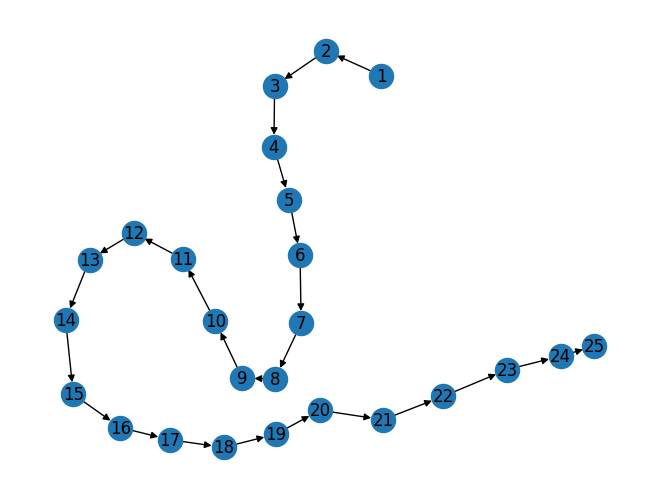

In [ ]:


# networkx code for making a graph with repeating num-op pattern

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

G.add_node(1, name='x1', value=1, grad=0.0)
G.add_node(2, name='sin', value=0, grad=0.0)
G.add_node(3, name='x2', value=0, grad=0.0)
G.add_node(4, name='sin', value=0, grad=0.0)
G.add_node(5, name='x3', value=0, grad=0.0)
G.add_node(6, name='sin', value=0, grad=0.0)
G.add_node(7, name='x4', value=0, grad=0.0)
G.add_node(8, name='sin', value=0, grad=0.0)
G.add_node(9, name='x5', value=0, grad=0.0)
G.add_node(10, name='sin', value=0, grad=0.0)
G.add_node(11, name='x6', value=0, grad=0.0)
G.add_node(12, name='sin', value=0, grad=0.0)
G.add_node(13, name='x7', value=0, grad=0.0)
G.add_node(14, name='sin', value=0, grad=0.0)
G.add_node(15, name='x8', value=0, grad=0.0)
G.add_node(16, name='sin', value=0, grad=0.0)
G.add_node(17, name='x9', value=0, grad=0.0)
G.add_node(18, name='sin', value=0, grad=0.0)
G.add_node(19, name='x10', value=0, grad=0.0)
G.add_node(20, name='sin', value=0, grad=0.0)
G.add_node(21, name='x11', value=0, grad=0.0)   
G.add_node(22, name='sin', value=0, grad=0.0)
G.add_node(23, name='x12', value=0, grad=0.0)
G.add_node(24, name='sin', value=0, grad=0.0)
G.add_node(25, name='x13', value=0, grad=0.0)

G.add_edge(1, 2)

G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 7)
G.add_edge(7, 8)
G.add_edge(8, 9)
G.add_edge(9, 10)
G.add_edge(10, 11)

G.add_edge(11, 12)
G.add_edge(12, 13)
G.add_edge(13, 14)
G.add_edge(14, 15)
G.add_edge(15, 16)
G.add_edge(16, 17)
G.add_edge(17, 18)
G.add_edge(18, 19)
G.add_edge(19, 20)
G.add_edge(20, 21)

G.add_edge(21, 22)
G.add_edge(22, 23)
G.add_edge(23, 24)
G.add_edge(24, 25)

nx.draw(G, with_labels=True)
plt.show()

